# Task 2 - EDA on wine reviews
## Name: Bhavya Gohil

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### Loading the data

In [2]:
data = pd.read_csv("wine-reviews.csv")
data.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             129971 non-null  int64  
 1   country                129908 non-null  object 
 2   description            129971 non-null  object 
 3   designation            92506 non-null   object 
 4   points                 129971 non-null  int64  
 5   price                  120975 non-null  float64
 6   province               129908 non-null  object 
 7   region_1               108724 non-null  object 
 8   region_2               50511 non-null   object 
 9   taster_name            103727 non-null  object 
 10  taster_twitter_handle  98758 non-null   object 
 11  title                  129971 non-null  object 
 12  variety                129970 non-null  object 
 13  winery                 129971 non-null  object 
dtypes: float64(1), int64(2), object(11)


In [4]:
data.describe()

,Unnamed: 0,points,price
count,129971.000000,129971.000000,120975.000000
mean,64985.000000,88.447138,35.363389
std,37519.540256,3.039730,41.022218
min,0.000000,80.000000,4.000000
25%,32492.500000,86.000000,17.000000
50%,64985.000000,88.000000,25.000000
75%,97477.500000,91.000000,42.000000
max,129970.000000,100.000000,3300.000000


In [5]:
data.shape

(129971, 14)

### Cleaning data

In [6]:
# Dropping useless columns

data.columns

Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'region_2', 'taster_name',
       'taster_twitter_handle', 'title', 'variety', 'winery'],
      dtype='object')

In [7]:
data = data.drop(["Unnamed: 0", "designation", "region_1", "region_2", "taster_name", "taster_twitter_handle"], axis=1)
data.head()

,country,description,points,price,province,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",87,NaN,Sicily & Sardinia,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Douro,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Oregon,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Michigan,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",87,65.0,Oregon,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   country      129908 non-null  object 
 1   description  129971 non-null  object 
 2   points       129971 non-null  int64  
 3   price        120975 non-null  float64
 4   province     129908 non-null  object 
 5   title        129971 non-null  object 
 6   variety      129970 non-null  object 
 7   winery       129971 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 7.9+ MB


In [9]:
# Dropping rows with missing values

data = data.dropna(subset=["country","price","province","variety"])

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120915 entries, 1 to 129970
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   country      120915 non-null  object 
 1   description  120915 non-null  object 
 2   points       120915 non-null  int64  
 3   price        120915 non-null  float64
 4   province     120915 non-null  object 
 5   title        120915 non-null  object 
 6   variety      120915 non-null  object 
 7   winery       120915 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 8.3+ MB


### Exploratory data analysis

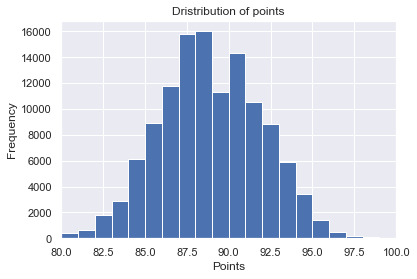

In [11]:
# Distribution of points

plt.hist(data=data, x='points', bins=np.arange (80, data['points'].max()+1, 1))
plt.xlim(80,100)
plt.title('Dristribution of points')
plt.xlabel('Points')
plt.ylabel('Frequency');

#### The point distribution follows a bell curve 

Text(0, 0.5, 'No. of ratings')

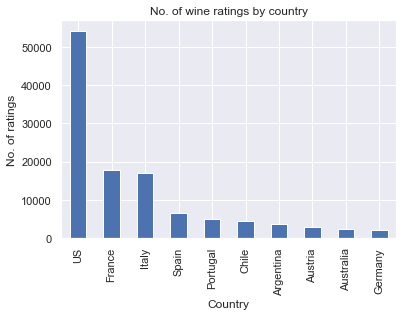

In [12]:
# Top 10 wine producing countries

top10 = data["country"].value_counts()[:10]
top10.plot(kind='bar')
plt.title('No. of wine ratings by country')
plt.xlabel('Country')
plt.ylabel('No. of ratings')

#### We can see that the US produces highest amount of wines, well above 50,000

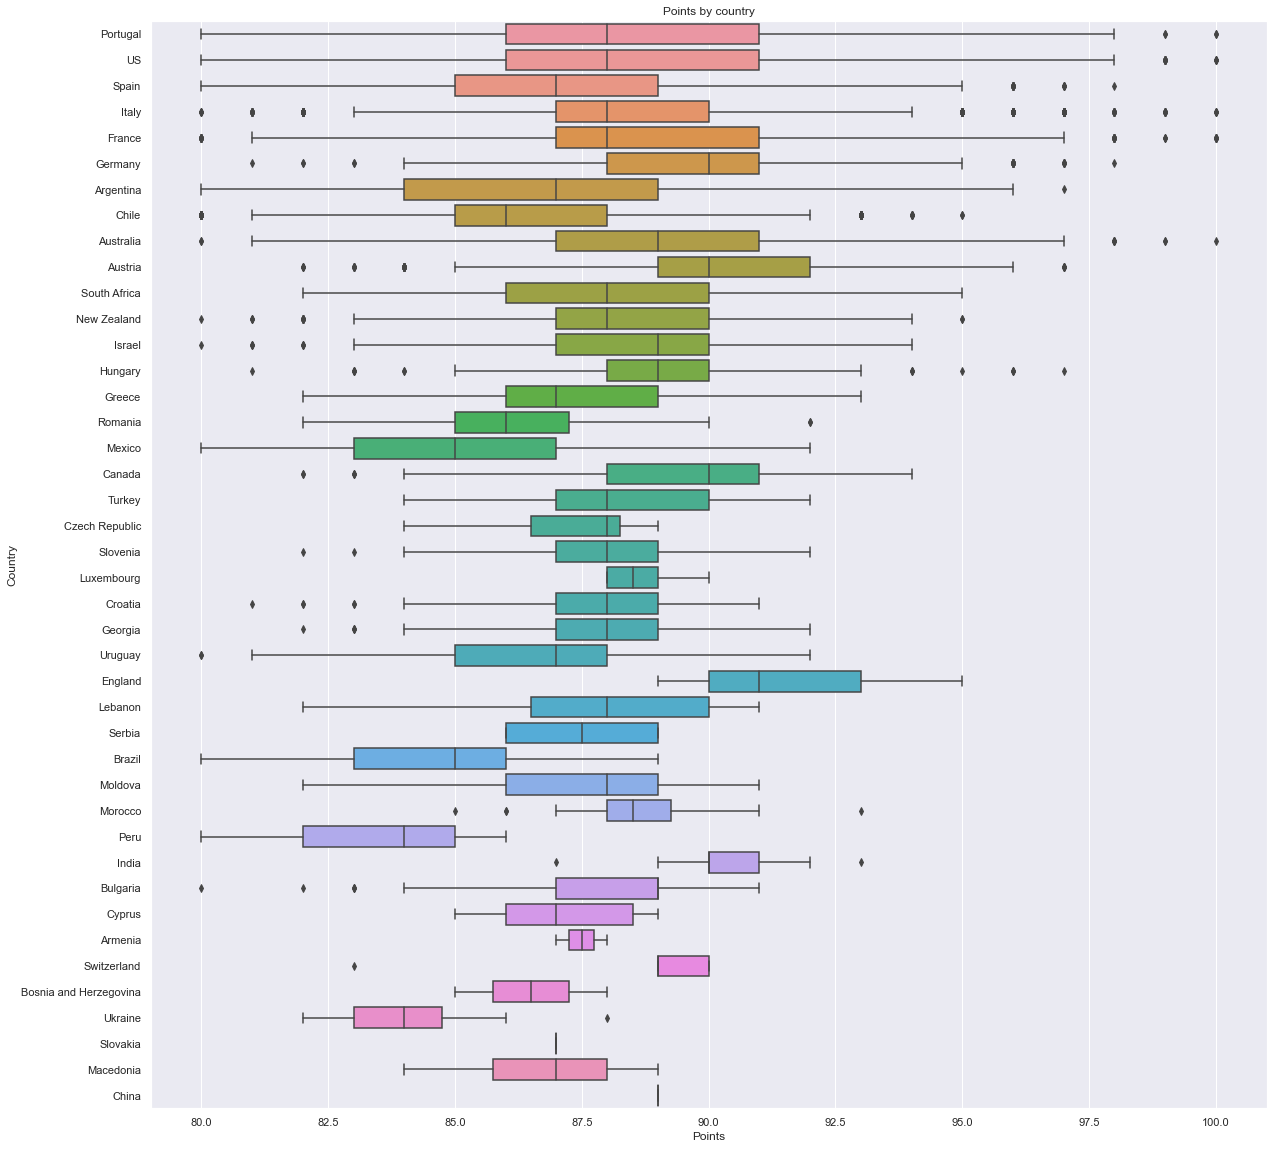

In [13]:
# Points by country

plt.figure(figsize=(20,20))
sns.boxplot(data=data, x='points', y='country')
plt.title('Points by country')
plt.xlabel('Points')
plt.ylabel('Country');

#### From the boxplot above, England has highest average points of wine, but also countries like Portugal, US, Italy, France, and Australia has produced wines that had scored 100 points

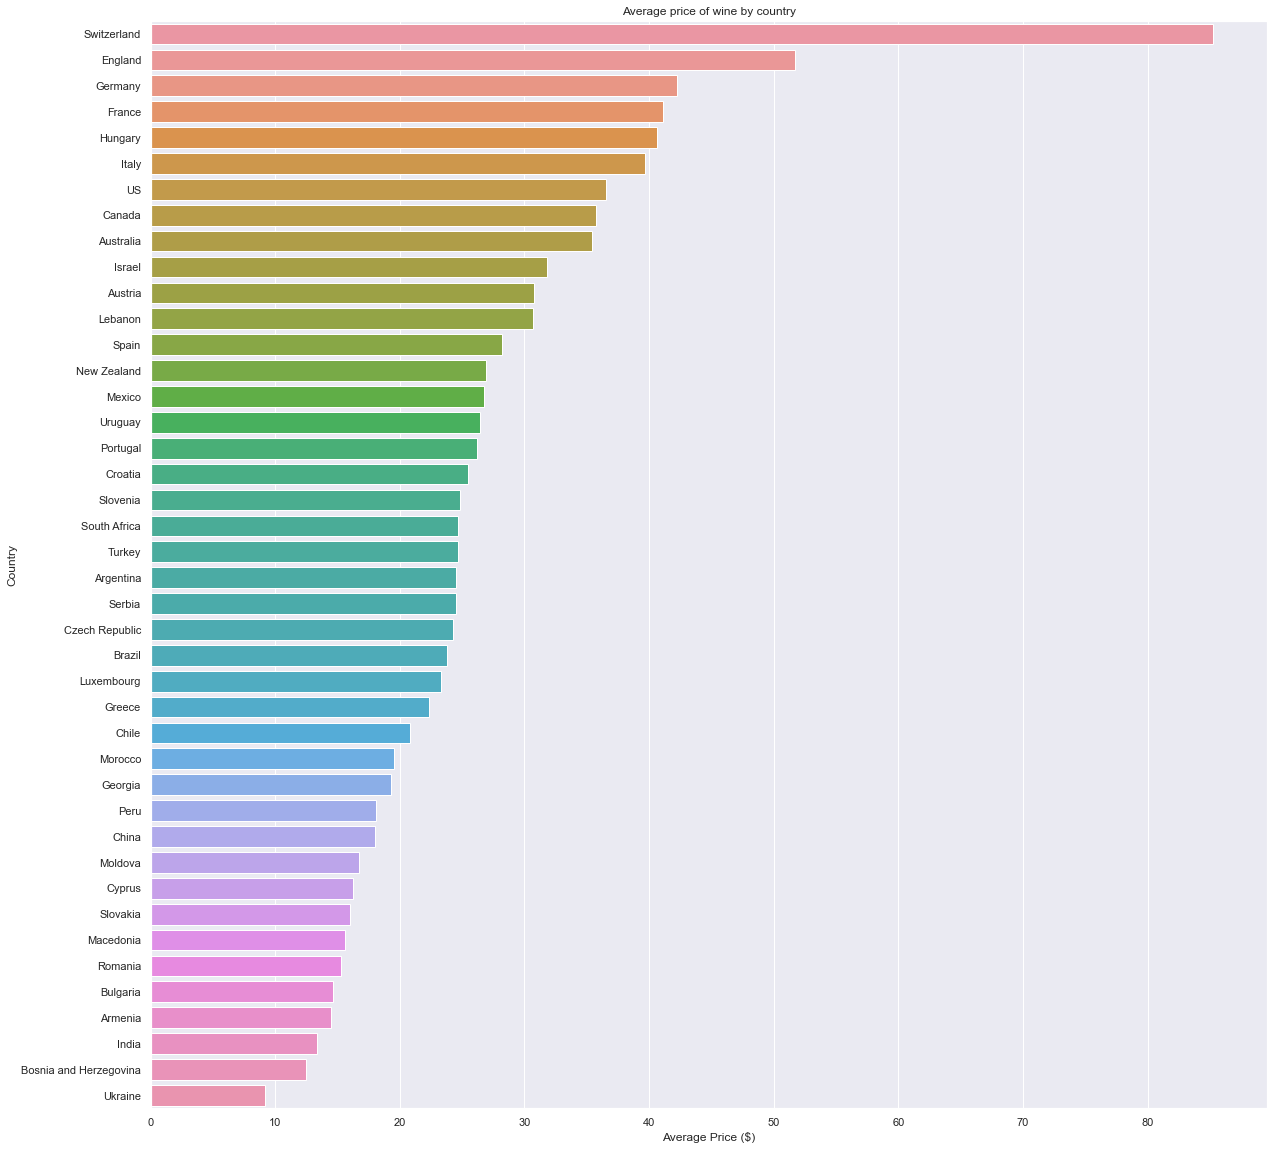

In [14]:
# Average price of wine by country

avg_price = data.groupby("country").agg("mean")
avg_price = avg_price.sort_values(by="price", ascending = False)
y = avg_price.index.to_series()
x = avg_price["price"]

plt.figure(figsize=(20,20))
sns.barplot(x=x,y=y)
plt.title('Average price of wine by country')
plt.xlabel('Average Price ($)')
plt.ylabel('Country');

#### From this, we can say that switzerland has highest average price of wines while ukraine has lowest average price of wines

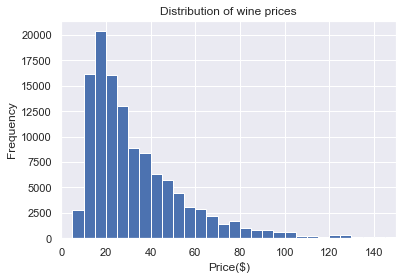

In [15]:
# Distribution of wine prices

bins = np.arange(0,data["price"].max()+5,5)
plt.hist(data=data,x='price',bins=bins)
plt.xlim(0,150)
plt.title('Distribution of wine prices')
plt.xlabel('Price($)')
plt.ylabel('Frequency');

#### From the graph we can see that a lot of wines are at the lower price spectrum, which makes them more affordable to common people

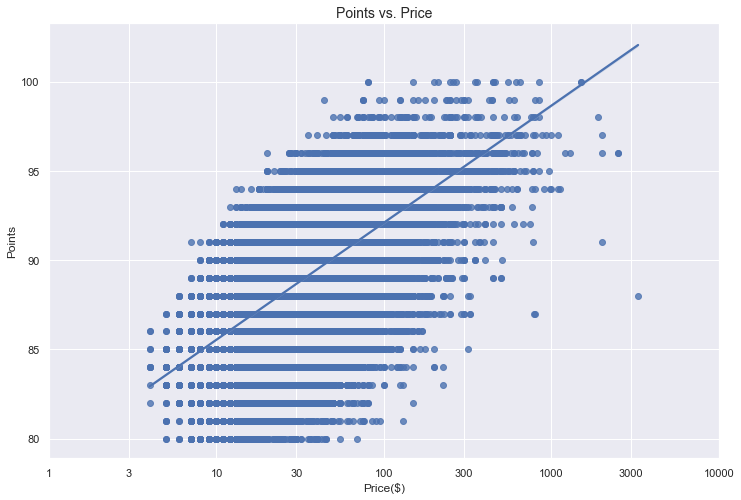

In [16]:
# Relation between prices and points

x = [1, 3, 10, 30, 100, 300, 1000, 3000, 10000]

plt.figure(figsize=(12, 8))
sns.regplot(x='price',y='points',data=data,logx=True)
plt.title("Points vs. Price", fontsize=14)
plt.xscale('log')
plt.xticks(x, x)
plt.xlabel("Price($)")
plt.ylabel("Points");

#### We can see from the graph that theere is a linear relation between price and points, which means that expensive wines get better ratings

In [17]:
# Top 10 most frequent variety of wines by points scored

data["variety"].value_counts()[:10]

Pinot Noir                  12785
Chardonnay                  11077
Cabernet Sauvignon           9384
Red Blend                    8466
Bordeaux-style Red Blend     5340
Riesling                     4971
Sauvignon Blanc              4780
Syrah                        4086
Rosé                         3261
Merlot                       3061
Name: variety, dtype: int64

Text(0, 0.5, 'Points')

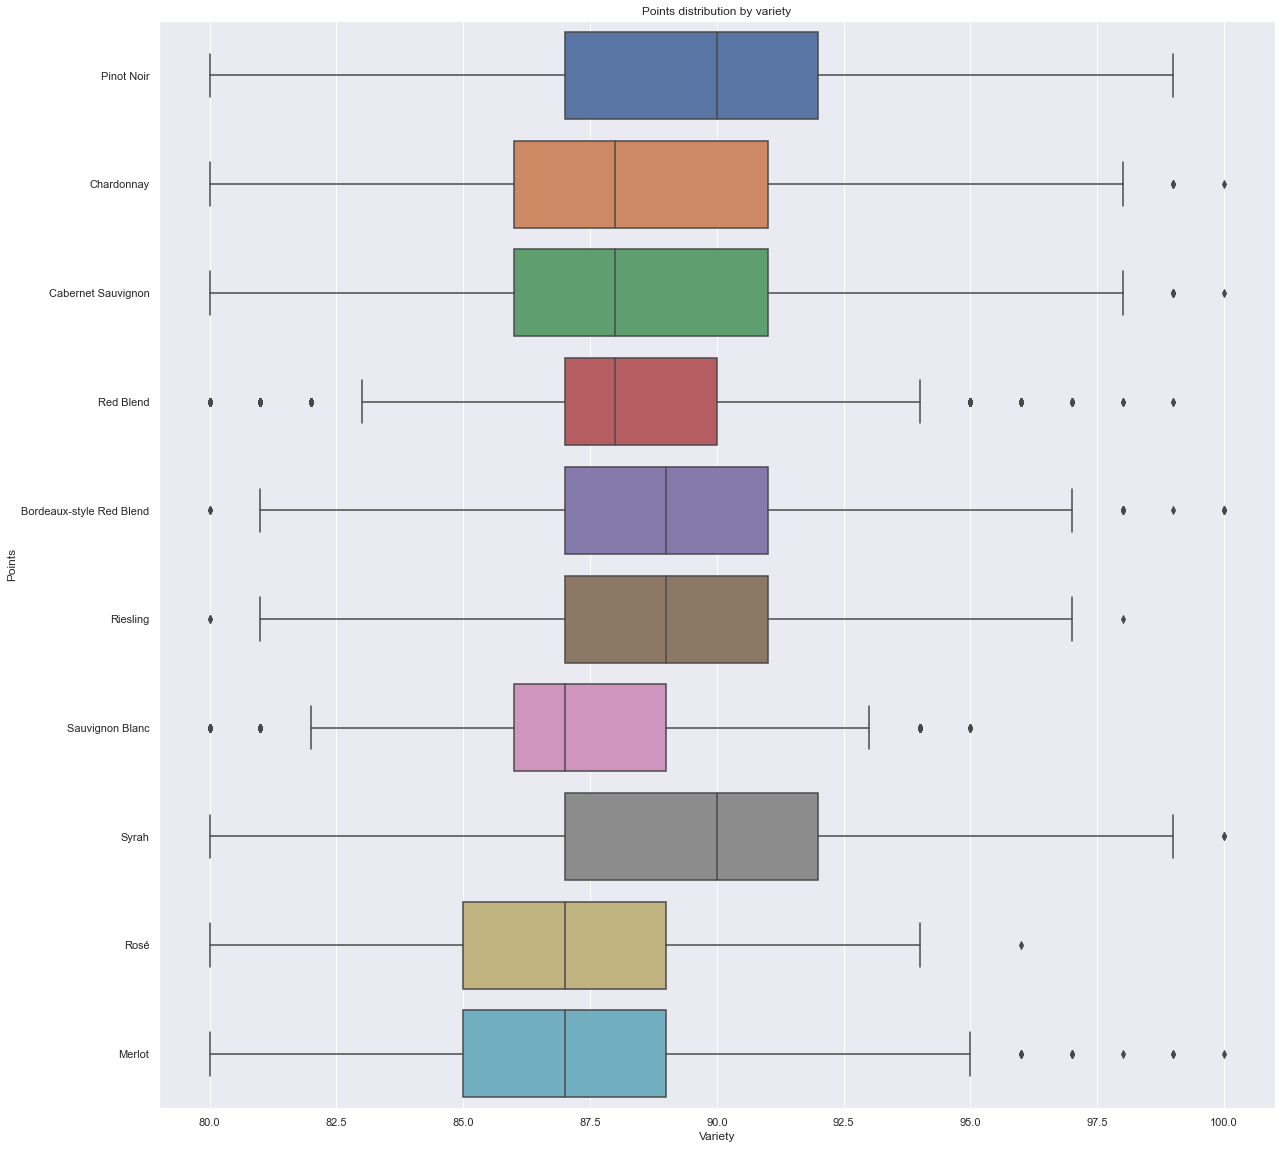

In [18]:
plt.figure(figsize=(20, 20))
sns.boxplot(
    data=data,
    x='points',
    y='variety',
    order=data["variety"].value_counts().iloc[:10].index
)
plt.title('Points distribution by variety')
plt.xlabel('Variety')
plt.ylabel('Points')

#### Pinot noir performs the best among top 10 wine varieties